In [1]:
import re

from collections import defaultdict
from conceptnet import ConceptNet
from dbpedia import DBPedia
import utils

wrap_cn = ConceptNet()
wrap_db = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

def snake_to_camel(text):
    return ''.join(x.capitalize() or '_' for x in text.split('_'))

In [2]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)

fruit {('Consequence', 'Result', 'IsA'), ('Fruit', 'Consequence', 'IsA'), ('Consequence', 'Phenomenon', 'IsA'), ('Fruit', 'ReproductiveStructure', 'IsA'), ('ReproductiveStructure', 'PlantOrgan', 'IsA'), ('Consequence', 'Significance', 'IsA')} {('Fruit', 'Building', 'rfd:type'), ('Structure', 'MusicalWork', 'rfd:type'), ('Fruit', 'Structure', 'has_hypernym'), ('Structure', 'Arrangement', 'has_hypernym')} set()
postcard set() {('Postcard', 'Piece', 'has_hypernym'), ('Postcard', 'MusicalWork', 'rfd:type')} set()
radio {('Broadcasting', 'Telecommunication', 'IsA'), ('CommunicationSystem', 'System', 'IsA'), ('Radio', 'CommunicationSystem', 'IsA'), ('CommunicationSystem', 'Facility', 'IsA'), ('Radio', 'Broadcasting', 'IsA')} {('Radio', 'Use', 'has_hypernym')} set()
phone {('LanguageUnit', 'Part', 'IsA'), ('Phone', 'LanguageUnit', 'IsA')} {('Telephone', 'Device', 'rfd:type'), ('Telephone', 'Device', 'has_hypernym')} set()
cellphone set() {('Telephone', 'Device', 'rfd:type'), ('Mobile_phone', 

one {('One', 'Unit', 'IsA'), ('Unit', 'Whole', 'IsA'), ('Digit', 'Extremity', 'IsA'), ('Digit', 'Integer', 'IsA'), ('One', 'Digit', 'IsA'), ('Unit', 'Part', 'IsA'), ('Unit', 'Organization', 'IsA'), ('Unit', 'Thing', 'IsA')} {('1_(number)', 'Number', 'has_hypernym')} set()
wristwatch {('Watch', 'Surveillance', 'IsA'), ('Watch', 'Timepiece', 'IsA'), ('Watch', 'Shift', 'IsA'), ('Wristwatch', 'Watch', 'IsA'), ('Watch', 'TimePeriod', 'IsA')} {('Watch', 'Timepiece', 'has_hypernym')} {'Timepiece'}
mug {('Mug', 'Containerful', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA')} {('Mug', 'SportsEvent', 'rfd:type'), ('Container', 'Software', 'rfd:type'), ('Container', 'Tool', 'has_hypernym'), ('Cup', 'Container', 'has_hypernym'), ('Mug', 'Cup', 'has_hypernym'), ('Cup', 'Company', 'rfd:type')} set()
trouser {('Garment', 'Clothing', 'IsA'), ('Trouser', 'Garment', 'IsA')} {('Trousers', 'Item', 'has_hypernym'), ('Trousers', 'Food', 'rfd:type')} set()
mobile set() set() set()
slipper {('Footwear',

eyeglass set() {('Glasses', 'Devices', 'has_hypernym'), ('Glasses', 'Device', 'rfd:type')} set()
pan {('Container', 'Instrumentality', 'IsA'), ('CookingUtensil', 'KitchenUtensil', 'IsA'), ('Pan', 'CookingUtensil', 'IsA'), ('Pan', 'Container', 'IsA'), ('Pan', 'MammalGenus', 'IsA'), ('MammalGenus', 'Genus', 'IsA')} set() set()
tablecloth {('Tablecloth', 'TableLinen', 'IsA'), ('TableLinen', 'Linen', 'IsA')} {('Tablecloth', 'Fashion', 'rfd:type'), ('Tablecloth', 'Cloth', 'has_hypernym')} set()
message {('Communication', 'Abstraction', 'IsA'), ('Message', 'Communication', 'IsA'), ('Communication', 'Act', 'IsA'), ('Communication', 'Connection', 'IsA')} {('Message', 'Organisation', 'rfd:type'), ('Message', 'Unit', 'has_hypernym')} set()
pasta {('Food', 'Content', 'IsA'), ('Food', 'Solid', 'IsA'), ('Dish', 'Containerful', 'IsA'), ('Pasta', 'Food', 'IsA'), ('Pasta', 'Dish', 'IsA'), ('Dish', 'DirectionalAntenna', 'IsA'), ('Dish', 'Container', 'IsA'), ('Dish', 'Crockery', 'IsA'), ('Dish', 'Nutrim

kettle {('Kettle', 'Containerful', 'IsA'), ('Kettle', 'PercussionInstrument', 'IsA'), ('PercussionInstrument', 'MusicalInstrument', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA')} {('Kettle', 'Beverage', 'rfd:type'), ('Kettle', 'Pot', 'has_hypernym')} set()
pot {('CookingUtensil', 'KitchenUtensil', 'IsA'), ('Stake', 'Post', 'IsA'), ('Pot', 'Vessel', 'IsA'), ('Pot', 'Containerful', 'IsA'), ('Stake', 'InstrumentOfExecution', 'IsA'), ('Belly', 'Inside', 'IsA'), ('Pot', 'Belly', 'IsA'), ('Belly', 'Bulge', 'IsA'), ('Pot', 'Cannabis', 'IsA'), ('Belly', 'AdiposeTissue', 'IsA'), ('Cannabis', 'Shrub', 'IsA'), ('Belly', 'Underpart', 'IsA'), ('Pot', 'CookingUtensil', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('Stake', 'Gamble', 'IsA'), ('Container', 'Instrumentality', 'IsA'), ('Cannabis', 'ControlledSubstance', 'IsA'), ('Cannabis', 'SoftDrug', 'IsA'), ('Pot', 'Container', 'IsA'), ('Vessel', 'Tube', 'IsA'), ('Pot', 'Stake', 'IsA'), ('Vessel', 'Craft', 'IsA')} set() set()
bottle

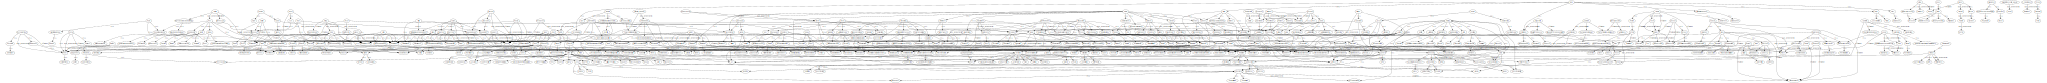

In [3]:
all_hypernyms = defaultdict(lambda: 0)
both_hypernyms = defaultdict(lambda: 0)
all_edges = set()
#both_edges = set()
for w in frame_lemmas:
    id_cn = wrap_cn.get_id(w)
    hypernyms_cn, edges_cn = wrap_cn.get_isa_tree(id_cn)
    hypernyms_cn = set([snake_to_camel(wrap_cn.get_name(el)) for el in hypernyms_cn])
    edges_cn = graph_utils.edges_name_normalize(edges_cn, lambda a: snake_to_camel(wrap_cn.get_name(a)))
    id_db = wrap_db.get_id(w)
    hypernyms_db, edges_db = wrap_db.get_all_types(id_db)
    hypernyms_db = set([wrap_db.get_name(el) for el in hypernyms_db])
    edges_db = graph_utils.edges_name_normalize(edges_db, wrap_db.get_name)
    hypernyms = hypernyms_cn.union(hypernyms_db)
    hypernyms_both = hypernyms_cn & hypernyms_db
    edges = edges_cn.union(edges_db)
    #edges_both = set([(e1[0], e1[1], '+'.join(e1[2], e2[2])) for e1 in edges_cn for e2 in edges_db if (e1[0] == e2[0] and e1[1] == e2[1])]) #edges_cn & edges_db
    for h in hypernyms:
        all_hypernyms[h] += 1
    for h in hypernyms_both:
        both_hypernyms[h] +=1
    print(w, edges_cn, edges_db, hypernyms_both)
    all_edges.update(edges)
    #both_edges.update(edges_both)

graph_utils.create_graph(all_edges)

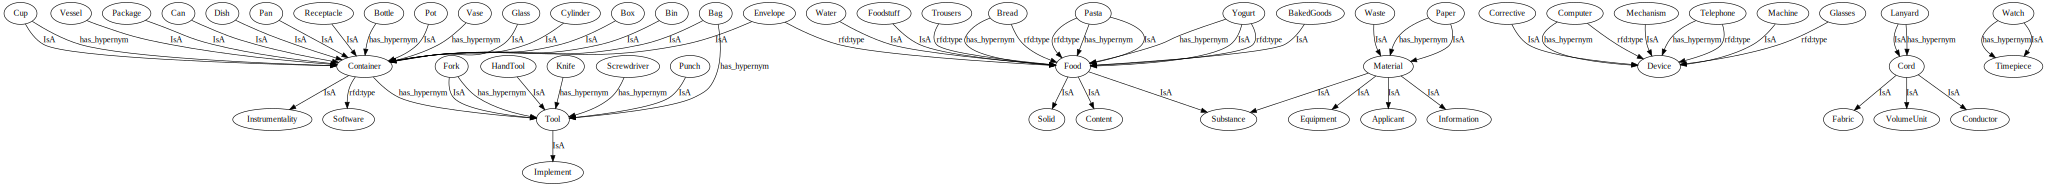

In [4]:
#graph_utils.create_graph(both_edges)
# the graph with edges that belong to both the sets of hypernyms
edges_with_nodes_both = set([e for e in all_edges if (e[0] in both_hypernyms or e[1] in both_hypernyms)])
graph_utils.create_graph(edges_with_nodes_both)